<a href="https://colab.research.google.com/github/kamilenovaes/machine-learning-python/blob/main/notebooks/13-tSNE-UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparando t-SNE e UMAP para redução de dimensionalidade

## 🎯 Objetivos

* Aplicar **t-SNE** e **UMAP** em problemas de redução de dimensionalidade de espaço de atributos (feature space)
* Usar **PCA** como linha de base (baseline) para comparar e avaliar resultados de t-SNE e UMAP


## Introdução

Vamos implementar dois algoritmos avançados de redução de dimensionalidade (**t-SNE** e **UMAP**) em dados sintéticos e comparar com a redução via **PCA**.

- Primeiro, vamos gerar um conjunto de dados sintético de *blobs* (aglomerados) em um espaço de atributos **3D** e explorar visualmente os pontos em um gráfico 3D interativo.
- Em seguida, vamos projetar esses dados para **2D** usando os três métodos.

Para fins didáticos, os *blobs* serão coloridos para facilitar a comparação: o que cada algoritmo preserva (ou distorce) em termos de **separação entre grupos** e **densidade relativa**.


In [ ]:
# !pip install numpy==2.2.0
# !pip install pandas==2.2.3
# !pip install matplotlib==3.9.3
# !pip install plotly==5.24.1
!pip install --upgrade scikit-learn umap-learn

## 1. Bibliotecas


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

## 2. Gerar dados sintéticos com quatro clusters em um espaço 3D


In [17]:
# Centros dos clusters:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

# Desvios-padrão dos clusters:
cluster_std=[1,1,2,3.5]

# Gerar os "blobs" e retornar os dados e os rótulos dos clusters
X, labels_ = make_blobs(n_samples=500, centers=centers, n_features=3, cluster_std=cluster_std, random_state=42)

## 3. Visualizar os dados em um gráfico 3D interativo (Plotly)


In [4]:
# Criar um DataFrame para o Plotly
df = pd.DataFrame(X, columns=['X', 'Y', 'Z'])

# Criar um gráfico de dispersão 3D interativo
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color=labels_.astype(str) ,  opacity=0.7,  color_discrete_sequence=px.colors.qualitative.G10, title="3D Scatter Plot of Four Blobs")

fig.update_traces(marker=dict(size=5, line=dict(width=1, color='black')), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800)  # Remove color bar, resize plot

fig.show()

### Exercício 1. O que você observa sobre os quatro *blobs*?


- Os *blobs* têm **densidades diferentes**.
- Um *blob* é bem **mais separado** dos demais.
- Os dois maiores *blobs* são distintos entre si, mas ambos têm um pouco de **sobreposição** com o *blob* intermediário.


### Exercício 2. Padronize os dados para preparar a entrada para os três métodos de projeção.


In [18]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Aplicar t-SNE para reduzir a dimensionalidade para 2D
Aqui vamos definir **perplexity = 30** (valor padrão). Em geral, a *perplexity* controla um compromisso entre estrutura **local** e **mais global**; ao alterá-la, o resultado pode mudar bastante.


In [19]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

### 4.1. Plotar o resultado 2D do t-SNE


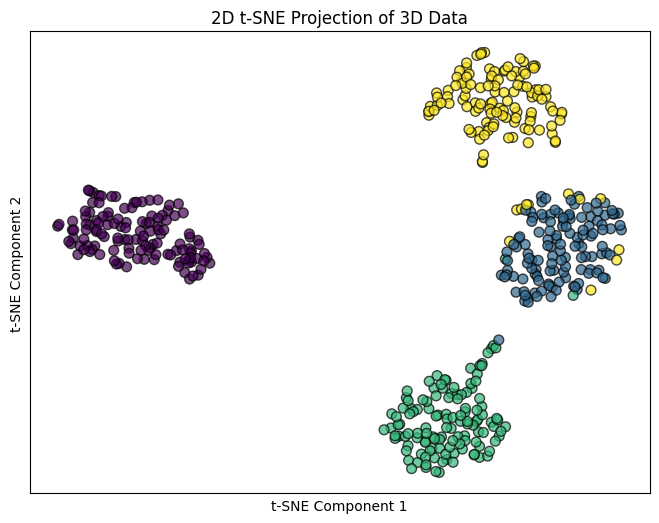

In [20]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

#### Exercício 3. O que você pode dizer sobre este resultado do t-SNE?


- O t-SNE projetou os pontos em **quatro clusters bem definidos**, embora no dado original existisse alguma **sobreposição** entre certos grupos.
- É possível notar pontos “indo parar” em clusters diferentes; vale lembrar que o t-SNE **não conhece** os rótulos verdadeiros.
- Os clusters ficam com densidades relativamente parecidas.
- Um resultado “perfeito” **não necessariamente** separaria totalmente regiões que de fato se sobrepõem no espaço original.
- A distância entre os grupos tende a refletir (aproximadamente) o quanto eles estavam separados no espaço 3D original.



## 5. Comparar UMAP e PCA na redução de dimensionalidade para 2D


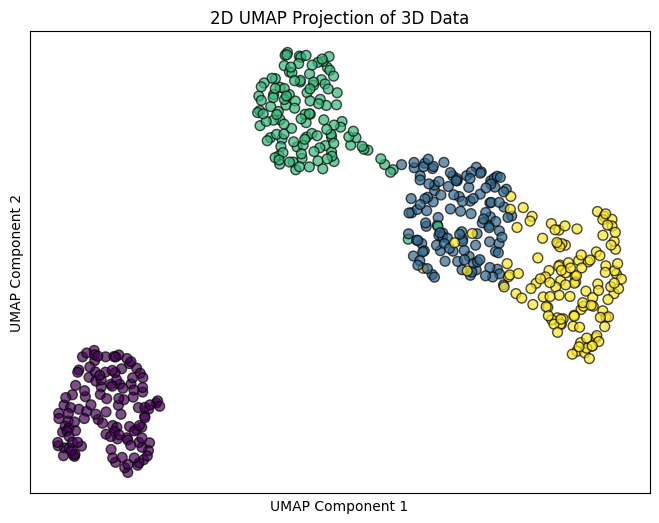

In [21]:
# Aplicar o UMAP para reduzir a dimensionalidade para 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

# Plota o resultado da projeção UMAP 2D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()


#### Exercício 4. O que você pode dizer sobre este resultado do UMAP?


- O UMAP projeta os pontos em **quatro clusters parcialmente distintos**, com um grupo totalmente separado dos demais.
- Diferente do t-SNE, ele tende a preservar melhor a **conectividade** quando há clusters parcialmente sobrepostos.
- Assim como no t-SNE, alguns pontos acabam mais próximos de outro grupo na projeção 2D.
- Um resultado “perfeito” **não** separaria totalmente regiões que realmente se sobrepõem no espaço original.
- A distância entre clusters costuma ser coerente com o grau de separação no dado 3D.



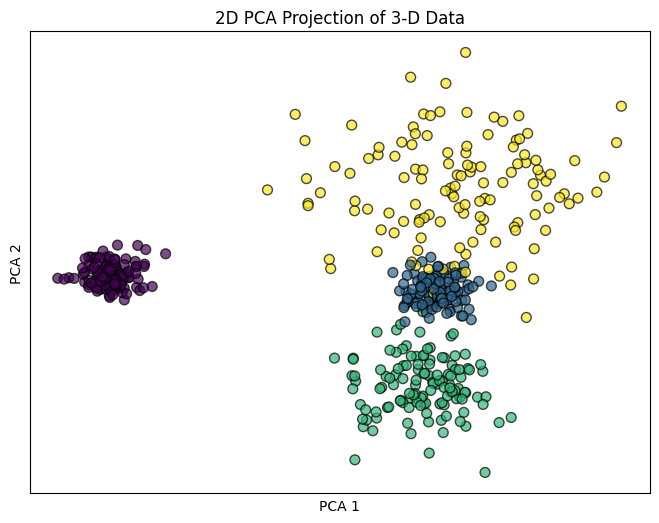

In [22]:
# Aplica PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(8, 6))

# Plota o resultado da PCA 2D (direita)
ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3-D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

### Exercício 5. O que você pode dizer sobre este resultado do PCA?


- O PCA preservou bem as **densidades relativas** dos *blobs*.
- O PCA também preservou a **separação relativa** entre os grupos.
- As distâncias entre clusters ficam bem consistentes com o quanto eles eram separados no espaço original.
- Neste experimento, o PCA e o t-SNE executaram bem mais rápido do que o UMAP.
- Na prática, este exemplo lembra um ponto importante: métodos mais avançados **não garantem** um resultado melhor do que uma baseline simples e bem estabelecida.